# CVIT Summer Workshop 2020

Day 03 (Part 03): Geometric Image Processing

Instructor: Pranay Gupta

In [8]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

from skimage import io
from skimage import morphology as morp

import plotly
import plotly.express as px
import plotly.graph_objects as go

## Part 01: BGR to RGB in OpenCV

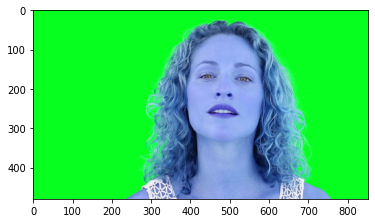

In [9]:
image1 = cv2.imread('./images/chroma_img.jpg', cv2.IMREAD_UNCHANGED)

plt.imshow(image1)

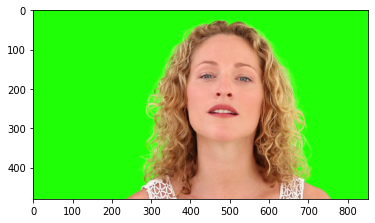

In [12]:
image2 = cv2.imread('./images/chroma_img.jpg', cv2.IMREAD_UNCHANGED)
image3 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.imshow(image3)

In [14]:
print("Image Type: ", type(image3), " Image Dimensions: ", image3.shape)

Image Type:  <class 'numpy.ndarray'>  Image Dimensions:  (480, 852, 3)


## Part 02: Chroma Keying

Another article for reference: https://medium.com/fnplus/blue-or-green-screen-effect-with-open-cv-chroma-keying-94d4a6ab2743

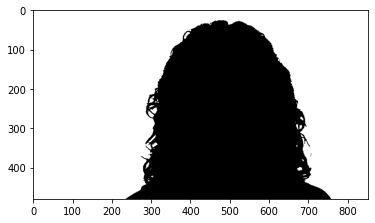

In [21]:
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

mask1 = cv2.inRange(image3, lower_green, upper_green)
mask2 = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask2)

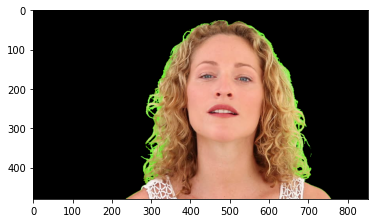

In [22]:
masked_image = np.copy(image3)
masked_image[mask1 != 0] = [0, 0, 0]

plt.imshow(masked_image)

Image Type:  <class 'numpy.ndarray'>  Image Dimensions:  (720, 1280, 3)


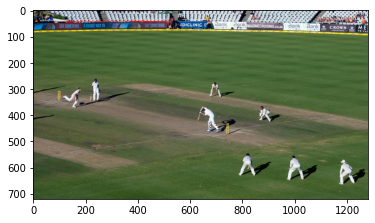

In [27]:
image_bg = cv2.imread('./images/stadium.jpg')
image_bg = cv2.cvtColor(image_bg, cv2.COLOR_BGR2RGB)

print("Image Type: ", type(image_bg), " Image Dimensions: ", image_bg.shape)

plt.imshow(image_bg)

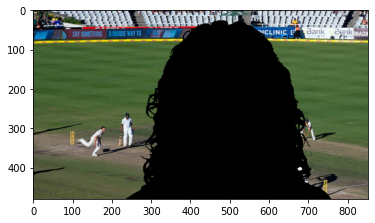

In [30]:
image_bg_crop = image_bg[0 : 480, 0 : 852]
image_bg_crop[mask == 0] = [0, 0, 0]

plt.imshow(image_bg_crop)

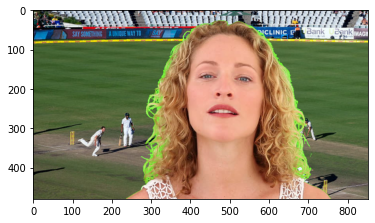

In [33]:
image_final = image_bg_crop + masked_image

plt.imshow(image_final)

## Part 03: Translating an Image

In [36]:
image = cv2.imread('./images/boy_smiling.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, channels = image_rgb.shape
print("Height: ", height, " Width: ", width)

quarter_height, quarter_width = height / 4, width / 4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
print("T: ", T)

Height:  394  Width:  400
T:  [[  1.    0.  100. ]
 [  0.    1.   98.5]]


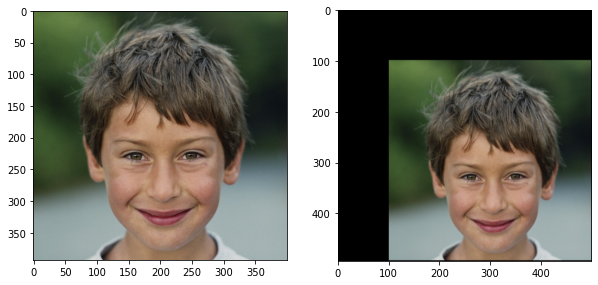

In [37]:
image_translation = cv2.warpAffine(image_rgb, T, (width + 100, height + 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [10, 10])
ax1.imshow(image_rgb)
ax2.imshow(image_translation)

plt.show()

## Part 04: Rotating an Image

## Part 05: Scaling an Image